In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from dateutil.parser import parse
from dateutil import parser

In [17]:
plt.rcParams['font.family'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus']=False

# Data Cleaning

## Load Data

In [3]:
data = pd.read_csv('userlostprob.csv')
data.head()

,label,sampleid,d,arrival,iforderpv_24h,decisionhabit_user,historyvisit_7ordernum,historyvisit_totalordernum,hotelcr,ordercanceledprecent,...,lowestprice_pre2,lasthtlordergap,businessrate_pre2,cityuvs,cityorders,lastpvgap,cr,sid,visitnum_oneyear,h
0,0,24636,2016-05-18,2016-05-18,0,NaN,NaN,NaN,1.04,NaN,...,615.0,NaN,0.29,12.880,3.147,NaN,NaN,7,NaN,12
1,1,24637,2016-05-18,2016-05-18,0,NaN,NaN,NaN,1.06,NaN,...,513.0,NaN,0.53,17.933,4.913,NaN,NaN,33,NaN,14
2,0,24641,2016-05-18,2016-05-19,0,NaN,NaN,NaN,1.05,NaN,...,382.0,NaN,0.60,3.993,0.760,NaN,NaN,10,NaN,19
3,0,24642,2016-05-18,2016-05-18,0,NaN,NaN,NaN,1.01,NaN,...,203.0,NaN,0.18,3.220,0.660,NaN,NaN,8,NaN,16
4,1,24644,2016-05-18,2016-05-19,0,NaN,NaN,NaN,1.00,NaN,...,84.0,NaN,NaN,0.013,NaN,NaN,NaN,1,NaN,21


In [4]:
data.to_csv('userlostprob.csv',index=False)

## Exploratory Data Analysis (EDA)

In [5]:
data.shape

(689945, 51)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689945 entries, 0 to 689944
Data columns (total 51 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   label                             689945 non-null  int64  
 1   sampleid                          689945 non-null  int64  
 2   d                                 689945 non-null  object 
 3   arrival                           689945 non-null  object 
 4   iforderpv_24h                     689945 non-null  int64  
 5   decisionhabit_user                385450 non-null  float64
 6   historyvisit_7ordernum            82915 non-null   float64
 7   historyvisit_totalordernum        386525 non-null  float64
 8   hotelcr                           689148 non-null  float64
 9   ordercanceledprecent              447831 non-null  float64
 10  landhalfhours                     661312 non-null  float64
 11  ordercanncelednum                 447831 non-null  f

In [7]:
import pandas as pd
import numpy as np
from datetime import datetime, date

In [8]:
data['d'] = pd.to_datetime(data['d'])
data['arrival'] = pd.to_datetime(data['arrival'])

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689945 entries, 0 to 689944
Data columns (total 51 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   label                             689945 non-null  int64         
 1   sampleid                          689945 non-null  int64         
 2   d                                 689945 non-null  datetime64[ns]
 3   arrival                           689945 non-null  datetime64[ns]
 4   iforderpv_24h                     689945 non-null  int64         
 5   decisionhabit_user                385450 non-null  float64       
 6   historyvisit_7ordernum            82915 non-null   float64       
 7   historyvisit_totalordernum        386525 non-null  float64       
 8   hotelcr                           689148 non-null  float64       
 9   ordercanceledprecent              447831 non-null  float64       
 10  landhalfhours                   

| Features                             | Description                                      |
| -------------------------------- | ----------------------------------------- |
| sampleid                         | Sample id                                    |
| label                            | Target Variable                                  |
| d                                | Visit Date                                  |
| arrival                          | Arrival Date                                  |
| iforderpv_24h                    | Whether to visit the order filling page within 24 hours |
| decisionhabit_user               | Decision-making habits: Observe decision-making habits on a user basis        |
| historyvisit_7ordernum           | The number of user's historical orders in the past 7 days                       |
| historyvisit_totalordernum       | The number of user's historical orders in the past year                       |
| hotelcr                          | Current hotel history cr                            |
| ordercanceledprecent             | Order Canceled % within one year     |
| landhalfhours                    | Login time within 24 hours                          |
| ordercanncelednum                | Number of orders cancelled by users in a year                      |
| commentnums                      | Current hotel reviews                            |
| starprefer                       | Star Preference                                  |
| novoters                         | Number of Current Hotel Raters                          |
| consuming_capacity               | Consuming Capacity Index                              |
| historyvisit_avghotelnum         | Average number of hotel visits per day by users in the past 3 months             |
| cancelrate                       | Cancel Rate of Current Hotel |
| historyvisit_visit_detailpagenum | Number of pages of hotel details visited in 7 days                     |
| delta_price1                     | User preference prices-24 hours of most viewed hotel prices       |
| price_sensitive                  | Price Sensitivity                            |
| hoteluv                          | Current Hotel History uv             |
| businessrate_pre                 | The most frequently viewed hotel business attribute index in 24 hours of history    |
| ordernum_oneyear                 | Order Number within one year               |
| cr_pre                           | 24 hours of history most viewed hotel history cr          |
| avgprice                         | Average Price                                  |
| lowestprice                      | Lowest Price of Current Hotel                        |
| firstorder_bu                    | First order bu                                   |
| customereval_pre2                | 24-hour historical browsing hotel customer rating average            |
| delta_price2                     | User's preference price-24 hours browsing hotel average price       |
| commentnums_pre                  | Most viewed hotel reviews in 24-hour history          |
| customer_value_profit            | Customer Value_Last 1 year                            |
| commentnums_pre2                 | Average number of hotel reviews in 24-hour historical browsing              |
| cancelrate_pre                   | Historical cancellation rate of the most visited hotel within 24 hours      |
| novoters_pre2                    | 24-hour historical browsing hotel rating average number of people            |
| novoters_pre                     | The number of hotel ratings that have been viewed the most in the 24-hour history        |
| ctrip_profits                    | Customer Value                                  |
| deltaprice_pre2_t1               | The average price difference between the visited hotel price and the opponent's price within 24 hours, t+1 |
| lowestprice_pre                  | The lowest price available for the most visited hotel within 24 hours      |
| uv_pre                           | 24 hours history most viewed hotel history uv          |
| uv_pre2                          | 24-hour historical browsing hotel historical uv average              |
| lowestprice_pre2                 | Have visited the hotel within 24 hours to book the lowest average price          |
| lasthtlordergap                  | Time from the last order within one year                   |
| businessrate_pre2                | The average value of the business attribute index of the hotel visited within 24 hours        |
| cityuvs                          | The number of app uvs that visited the current city with the same check-in date yesterday     |
| cityorders                       | The number of app orders submitted yesterday for the same check-in date in the current city     |
| lastpvgap                        | Time from last visit within one year                      |
| cr                               | Conversion Rate                                |
| sid                              | Session id, sid=1 can be considered as a new visit                 |
| visitnum_oneyear                 | Annual Visit                                |
| h                                | Visit time                                |

### De-Duplicates

In [10]:
data.drop_duplicates(inplace=True)
data.shape

(689945, 51)

### Missing Values

**Checking the missing values % and Sort values 

In [11]:
null_ = data.isna().mean().reset_index().sort_values(by=0)

null_1 = null_.rename(columns={'index':'Feature',0:'Missing_Value_%'}).reset_index(drop=True)

In [12]:
null_1 = null_1.sort_values(by = ["Missing_Value_%"], ascending = False)
null_1.head(20)

,Feature,Missing_Value_%
50,historyvisit_7ordernum,0.879824
49,historyvisit_visit_detailpagenum,0.554698
48,firstorder_bu,0.453590
47,decisionhabit_user,0.441332
46,historyvisit_totalordernum,0.439774
45,historyvisit_avghotelnum,0.437816
44,delta_price1,0.366405
43,delta_price2,0.365529
42,customer_value_profit,0.363539
41,ctrip_profits,0.354750


In [13]:
percent_all_data_na = null_1
percent_all_data_na.set_index(["Feature"], inplace=True)
percent_all_data_na.head()

,Missing_Value_%
Feature,
historyvisit_7ordernum,0.879824
historyvisit_visit_detailpagenum,0.554698
firstorder_bu,0.453590
decisionhabit_user,0.441332
historyvisit_totalordernum,0.439774


In [18]:
import seaborn as sns
sns.set_style("whitegrid")

Text(0.5, 1.0, 'Percent missing data by feature')

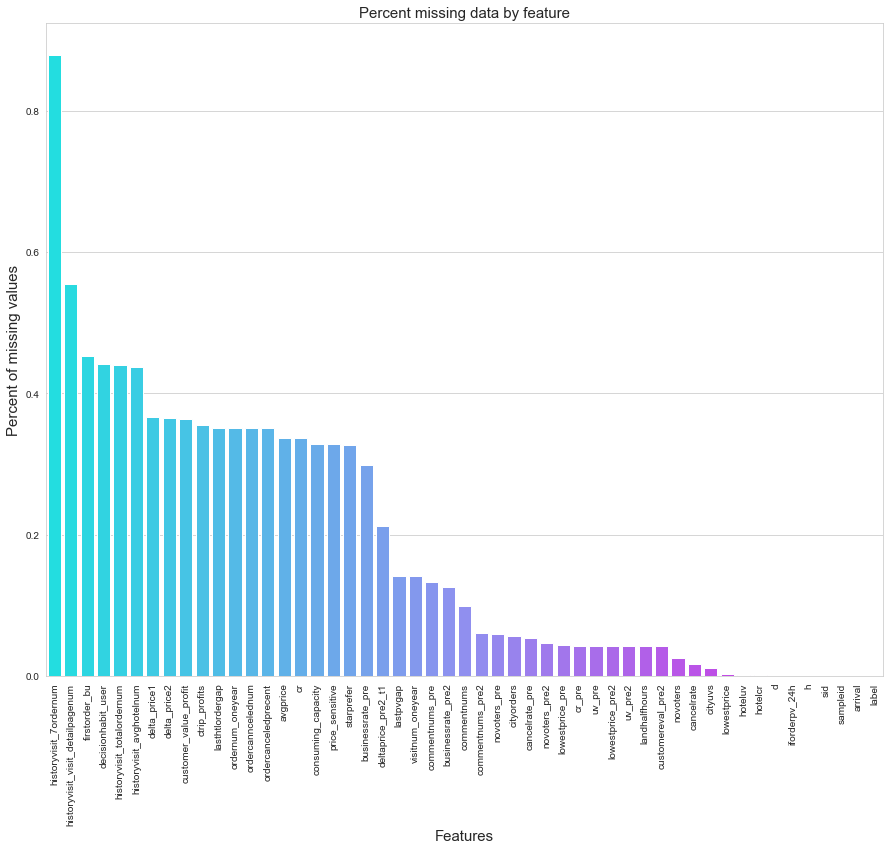

In [19]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=percent_all_data_na.index, y=percent_all_data_na['Missing_Value_%'], palette="cool")
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

<AxesSubplot:xlabel='Missing_Value_%', ylabel='Density'>

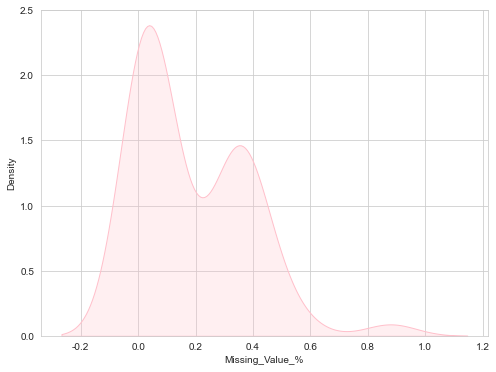

In [20]:
plt.figure(figsize=(8,6))
sns.kdeplot(null_1['Missing_Value_%'],shade=True,  color = 'pink')

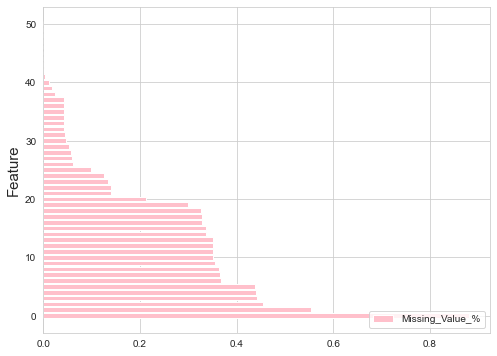

In [21]:
plt.figure(figsize=(8,6))
plt.barh(range(null_1.shape[0]),null_1['Missing_Value_%'],label='Missing_Value_%', color = 'pink')
plt.legend(loc=4)
plt.ylabel('Feature',fontsize=15);

In [22]:
null_.rename(columns={'index':'Feature',0:'Missing_Value_%'}).sort_values(by = ["Missing_Value_%"], ascending = False).head(20).set_index('Feature')

,Missing_Value_%
Feature,
historyvisit_7ordernum,0.879824
historyvisit_visit_detailpagenum,0.554698
firstorder_bu,0.453590
decisionhabit_user,0.441332
historyvisit_totalordernum,0.439774
historyvisit_avghotelnum,0.437816
delta_price1,0.366405
delta_price2,0.365529
customer_value_profit,0.363539


**Visualize Missing Value**

<AxesSubplot:>

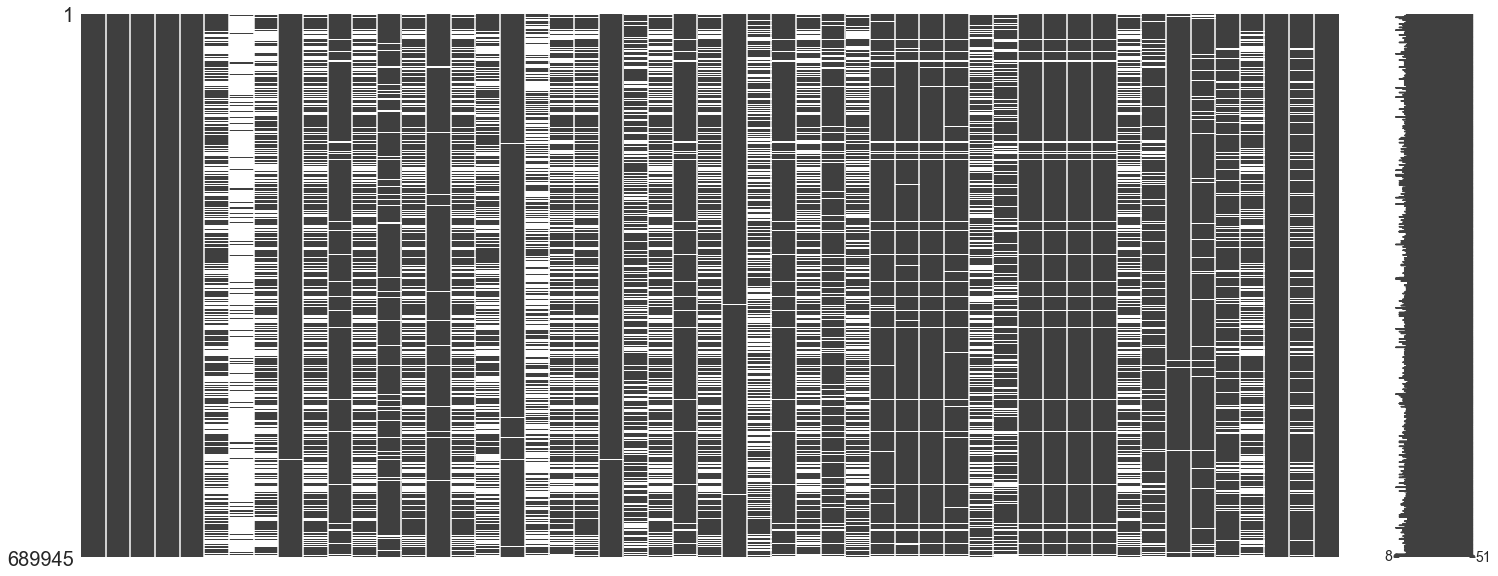

In [23]:
import missingno as msno
msno.matrix(data)

**Delete Missing value % larger than 70%**

In [24]:
data = data.drop(columns = ['historyvisit_7ordernum'])

### Outliers

In [25]:
data.describe([0.01,0.25,0.5,0.75,0.99],include='all').T

<ipython-input-25-460a179d4c9f>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.describe([0.01,0.25,0.5,0.75,0.99],include='all').T
<ipython-input-25-460a179d4c9f>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.describe([0.01,0.25,0.5,0.75,0.99],include='all').T


,count,unique,top,freq,first,last,mean,std,min,1%,25%,50%,75%,99%,max
label,689945.0,NaN,NaT,NaN,NaT,NaT,0.274452,0.446238,0.0,0.0,0.0,0.0,1.0,1.0,1.0
sampleid,689945.0,NaN,NaT,NaN,NaT,NaT,628540.209625,414681.498697,24636.0,36205.88,312320.0,599637.0,887460.0,2226892.56,2238426.0
d,689945,7,2016-05-20,111985,2016-05-15,2016-05-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
arrival,689945,37,2016-05-20,110982,2016-05-15,2016-06-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
iforderpv_24h,689945.0,NaN,NaT,NaN,NaT,NaT,0.193737,0.395226,0.0,0.0,0.0,0.0,0.0,1.0,1.0
decisionhabit_user,385450.0,NaN,NaT,NaN,NaT,NaT,5.317048,38.524483,0.0,1.0,2.0,3.0,5.0,27.0,3167.0
historyvisit_totalordernum,386525.0,NaN,NaT,NaN,NaT,NaT,11.710487,17.251429,1.0,1.0,2.0,6.0,14.0,82.0,711.0
hotelcr,689148.0,NaN,NaT,NaN,NaT,NaT,1.060996,0.045264,1.0,1.0,1.03,1.05,1.09,1.19,3.18
ordercanceledprecent,447831.0,NaN,NaT,NaN,NaT,NaT,0.342119,0.35421,0.0,0.0,0.0,0.25,0.57,1.0,1.0
landhalfhours,661312.0,NaN,NaT,NaN,NaT,NaT,6.086366,12.413225,0.0,0.0,0.0,0.0,4.0,48.0,49.0


**Block Method - Capping of outliers**

In [26]:
data.loc[:,['avgprice','ctrip_profits','lowestprice','lowestprice_pre']].describe([0.01,0.25,0.5,0.75,0.99],include='all').T

,count,mean,std,min,1%,25%,50%,75%,99%,max
avgprice,457261.0,422.458701,290.853332,1.000,91.000,232.00,350.000,524.00,1491.0000,6383.00
ctrip_profits,445187.0,4.208495,9.314438,-44.313,-0.393,0.34,1.347,4.32,40.7558,600.82
lowestprice,687931.0,318.806242,575.782415,-3.000,37.000,116.00,200.000,380.00,1823.0000,100000.00
lowestprice_pre,659689.0,315.954583,463.723643,1.000,38.000,118.00,208.000,385.00,1750.0000,100000.00


In [27]:
col_01 = ['avgprice','ctrip_profits','lowestprice','lowestprice_pre'] # Skewness

In [28]:
def block_lower(x):
# Replacing 1% quantile
    ql = x.quantile(.01)
    out = x.mask(x<ql,ql)
    return(out)

In [29]:
def block_upper(x):
# Replacing 99% quantile
    qu = x.quantile(.99)
    out = x.mask(x>qu,qu)
    return(out)

In [30]:
data.loc[:,col_01]=data.loc[:,col_01].apply(block_upper)

In [31]:
data.loc[:,col_01]=data.loc[:,col_01].apply(block_lower)

In [32]:
data.loc[:,['avgprice','ctrip_profits','lowestprice','lowestprice_pre']].describe([0.01,0.25,0.5,0.75,0.99],include='all').T

,count,mean,std,min,1%,25%,50%,75%,99%,max
avgprice,457261.0,418.442655,266.695037,91.000,91.000,232.00,350.000,524.00,1491.000000,1491.0000
ctrip_profits,445187.0,3.959791,6.815256,-0.393,-0.393,0.34,1.347,4.32,40.753392,40.7558
lowestprice,687931.0,305.025771,297.382838,37.000,37.000,116.00,200.000,380.00,1823.000000,1823.0000
lowestprice_pre,659689.0,304.439507,287.192512,38.000,38.000,118.00,208.000,385.00,1750.000000,1750.0000


## Spilit ofTraining Data and Test Data

In [33]:
data_copy = data.copy() # Copy Data

In [34]:
#corrmat = data_copy.corr()
#k = 10
#
#cols = corrmat.nlargest(k, 'label')['label'].index
#data_copy[cols].corr()
#sns.set(font_scale=1)
#sns.heatmap(data_copy[cols].corr(),
#            annot=True,linewidths=1)

In [35]:
X = data_copy.iloc[:,1:] #2:
y = data_copy.label

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y,test_size=0.3,random_state=666)

In [38]:
# Feature Engineering

In [39]:
data_train = Xtrain.iloc[:,:3]
data_test = Xtest.iloc[:,:3]

In [40]:
Xtrain

,sampleid,d,arrival,iforderpv_24h,decisionhabit_user,historyvisit_totalordernum,hotelcr,ordercanceledprecent,landhalfhours,ordercanncelednum,...,lowestprice_pre2,lasthtlordergap,businessrate_pre2,cityuvs,cityorders,lastpvgap,cr,sid,visitnum_oneyear,h
512823,879915,2016-05-17,2016-05-21,1,6.0,6.0,1.04,0.84,9.0,16.0,...,338.0,713.0,0.55,5.387,0.680,312.0,1.14,111,2162.0,18
28998,73262,2016-05-15,2016-05-15,0,2.0,25.0,1.05,0.99,0.0,374.0,...,728.0,97890.0,NaN,3.853,0.027,3594.0,1.00,54,1397.0,22
175239,316906,2016-05-15,2016-05-15,0,1.0,5.0,1.01,0.00,24.0,0.0,...,562.0,4601.0,0.02,11.573,0.813,299.0,1.07,385,2881.0,15
276529,485736,2016-05-16,2016-05-16,1,4.0,NaN,1.11,NaN,3.0,NaN,...,149.0,NaN,0.18,10.567,3.033,1273.0,1.00,37,1218.0,15
227980,404846,2016-05-16,2016-05-20,1,2.0,1.0,1.06,0.00,0.0,0.0,...,99.0,52076.0,NaN,0.160,0.013,31216.0,2.00,61,318.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321481,560456,2016-05-17,2016-05-17,0,6.0,2.0,1.06,0.50,0.0,1.0,...,333.0,1947.0,0.71,8.080,2.047,1852.0,1.50,6,289.0,12
303174,529935,2016-05-21,2016-06-08,1,NaN,1.0,1.01,1.00,24.0,1.0,...,1283.0,484891.0,0.04,0.287,0.013,5922.0,NaN,246,558.0,23
2878,29457,2016-05-20,2016-05-26,1,NaN,NaN,1.07,NaN,0.0,NaN,...,548.0,NaN,0.52,1.440,0.113,2033.0,NaN,6,1772.0,3
649118,1106538,2016-05-21,2016-05-21,0,NaN,NaN,1.01,NaN,0.0,NaN,...,179.0,NaN,0.01,0.467,NaN,NaN,NaN,655,NaN,21


In [41]:
data_test.reset_index(drop=True)

,sampleid,d,arrival
0,1035222,2016-05-20,2016-05-21
1,222533,2016-05-15,2016-05-15
2,851761,2016-05-15,2016-05-15
3,273451,2016-05-20,2016-05-20
4,330795,2016-05-20,2016-06-07
...,...,...,...
206979,907321,2016-05-16,2016-05-28
206980,218285,2016-05-15,2016-05-15
206981,601862,2016-05-19,2016-06-09
206982,1038976,2016-05-19,2016-05-22


In [42]:
data_train.reset_index(drop=True)

,sampleid,d,arrival
0,879915,2016-05-17,2016-05-21
1,73262,2016-05-15,2016-05-15
2,316906,2016-05-15,2016-05-15
3,485736,2016-05-16,2016-05-16
4,404846,2016-05-16,2016-05-20
...,...,...,...
482956,560456,2016-05-17,2016-05-17
482957,529935,2016-05-21,2016-06-08
482958,29457,2016-05-20,2016-05-26
482959,1106538,2016-05-21,2016-05-21


In [43]:
data_train.to_csv('data_train.csv')
data_test.to_csv('data_test.csv')

In [44]:
col_no = ['sid','iforderpv_24h','h'] #Features without missing values
col_clf = ['decisionhabit_user'] # Categorical features
col_neg = ['delta_price1','delta_price2','customer_value_profit'
           ,'ctrip_profits','deltaprice_pre2_t1'] # Numerical features with negative values
col_std = data.columns[data.describe(include='all').T['std'] >100].to_list() # std >100
col_std.remove('delta_price1')
col_std.remove('delta_price2')
col_std.remove('sampleid')
col_std.remove('lasthtlordergap')

<ipython-input-44-fd5362f907d6>:5: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  col_std = data.columns[data.describe(include='all').T['std'] >100].to_list() # std >100
<ipython-input-44-fd5362f907d6>:5: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  col_std = data.columns[data.describe(include='all').T['std'] >100].to_list() # std >100


In [45]:
col_35 = ['firstorder_bu','decisionhabit_user','historyvisit_totalordernum'
 ,'historyvisit_avghotelnum','customer_value_profit','ctrip_profits','ordernum_oneyear'
 ,'lasthtlordergap','ordercanceledprecent','ordercanncelednum'] # Missing 35% —— 55%

In [46]:
cols = X.columns.to_list()

col_norm = list(set(cols)-set(col_clf + col_std + col_neg + col_no +col_35))

In [47]:
col_norm

['landhalfhours',
 'price_sensitive',
 'cr_pre',
 'customereval_pre2',
 'hotelcr',
 'consuming_capacity',
 'sampleid',
 'cr',
 'historyvisit_visit_detailpagenum',
 'arrival',
 'businessrate_pre2',
 'businessrate_pre',
 'starprefer',
 'd',
 'cancelrate_pre',
 'cityorders',
 'cityuvs']

## Impute Missing Values

- Fill in categorical features with mode —— col_clf
- Fill in numerical features having negative values with median —— col_neg
- Fill in numerical continuous features whose std > 100 with median —— col_std
- Fill in numerical features with 35%_55% missing values with -1
- Fill in rest of features with mean —— col_norm

In [48]:
Xtrain.loc[:,col_clf] = Xtrain.loc[:,col_clf].fillna(Xtrain.loc[:,col_clf].mode())

Xtrain.loc[:,col_neg] = Xtrain.loc[:,col_neg].fillna(Xtrain.loc[:,col_neg].median())

Xtrain.loc[:,col_std] = Xtrain.loc[:,col_std].fillna(Xtrain.loc[:,col_std].median())

Xtrain.loc[:,col_norm] = Xtrain.loc[:,col_norm].fillna(Xtrain.loc[:,col_norm].mean())

Xtrain.loc[:,col_35] = Xtrain.loc[:,col_35].fillna(-1)

E:\Anaconda3_202105\lib\site-packages\pandas\core\indexing.py:1787: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, val, pi)
<ipython-input-48-846473e1f69b>:7: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  Xtrain.loc[:,col_norm] = Xtrain.loc[:,col_norm].fillna(Xtrain.loc[:,col_norm].mean())


In [49]:
Xtest.loc[:,col_clf] = Xtest.loc[:,col_clf].fillna(Xtest.loc[:,col_clf].mode())

In [50]:
Xtest.loc[:,col_neg] = Xtest.loc[:,col_neg].fillna(Xtest.loc[:,col_neg].median())

In [51]:
Xtest.loc[:,col_std] = Xtest.loc[:,col_std].fillna(Xtest.loc[:,col_std].median())

In [52]:
Xtest.loc[:,col_norm] = Xtest.loc[:,col_norm].fillna(Xtest.loc[:,col_norm].mean())

<ipython-input-52-7412baa64d6d>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  Xtest.loc[:,col_norm] = Xtest.loc[:,col_norm].fillna(Xtest.loc[:,col_norm].mean())


In [53]:
Xtest.loc[:,col_35] = Xtest.loc[:,col_35].fillna(-1)

**Checking if missing values**

In [54]:
Xtrain.isna().any().sum()

0

In [55]:
Xtest.isna().any().sum()

0

In [56]:
# Feature Creation
ordernum_oneyear_train = Xtrain.loc[:,'ordernum_oneyear'].reset_index(drop=True)
ordernum_oneyear_test = Xtest.loc[:,'ordernum_oneyear'].reset_index(drop=True)
avgprice_train = Xtrain.loc[:,'avgprice'].reset_index(drop=True)
avgprice_test = Xtest.loc[:,'avgprice'].reset_index(drop=True)

M_train = ordernum_oneyear_train * avgprice_train

M_test = ordernum_oneyear_test * avgprice_test

M_train.to_csv('M_train.csv')
M_test.to_csv('M_test.csv')

In [57]:
Xtrain.to_csv('Xtrain.csv')
Xtest.to_csv('Xtest.csv')
Ytrain.to_csv('Ytrain.csv')
Ytest.to_csv('Ytest.csv')

## Feature Selection

In [58]:
y.value_counts()

0    500588
1    189357
Name: label, dtype: int64

In [59]:
500588/189357

2.6436202516938905

In [60]:
y.shape

(689945,)

In [61]:
X.shape

(689945, 49)

In [62]:
Xtrain.describe().T

,count,mean,std,min,25%,50%,75%,max
sampleid,482961.0,628741.686575,414923.848005,24636.000,312243.000,600018.000000,887476.000000,2.238426e+06
iforderpv_24h,482961.0,0.193548,0.395079,0.000,0.000,0.000000,0.000000,1.000000e+00
decisionhabit_user,482961.0,2.531420,29.392478,-1.000,-1.000,1.000000,3.000000,2.383000e+03
historyvisit_totalordernum,482961.0,6.128317,14.346261,-1.000,-1.000,1.000000,7.000000,7.110000e+02
hotelcr,482961.0,1.061004,0.045234,1.000,1.030,1.050000,1.090000,3.180000e+00
ordercanceledprecent,482961.0,-0.129285,0.700904,-1.000,-1.000,0.000000,0.400000,1.000000e+00
landhalfhours,482961.0,6.069654,12.138277,0.000,0.000,0.000000,6.069654,4.900000e+01
ordercanncelednum,482961.0,100.740681,326.563902,0.000,1.000,2.000000,5.000000,1.347500e+04
commentnums,482961.0,1198.112061,2014.221599,0.000,144.000,513.000000,1466.000000,3.418900e+04
starprefer,482961.0,67.543379,15.739452,0.000,60.000,67.543379,77.100000,1.000000e+02


### VarianceThreshold

In [63]:
Xtrain.iloc[:,2:]

,arrival,iforderpv_24h,decisionhabit_user,historyvisit_totalordernum,hotelcr,ordercanceledprecent,landhalfhours,ordercanncelednum,commentnums,starprefer,...,lowestprice_pre2,lasthtlordergap,businessrate_pre2,cityuvs,cityorders,lastpvgap,cr,sid,visitnum_oneyear,h
512823,2016-05-21,1,6.0,6.0,1.04,0.84,9.0,16.0,1638.0,90.000000,...,338.0,713.0,0.55000,5.387,0.680000,312.0,1.140000,111,2162.0,18
28998,2016-05-15,0,2.0,25.0,1.05,0.99,0.0,374.0,1777.0,63.300000,...,728.0,97890.0,0.36838,3.853,0.027000,3594.0,1.000000,54,1397.0,22
175239,2016-05-15,0,1.0,5.0,1.01,0.00,24.0,0.0,161.0,84.000000,...,562.0,4601.0,0.02000,11.573,0.813000,299.0,1.070000,385,2881.0,15
276529,2016-05-16,1,4.0,-1.0,1.11,-1.00,3.0,2.0,1735.0,67.543379,...,149.0,-1.0,0.18000,10.567,3.033000,1273.0,1.000000,37,1218.0,15
227980,2016-05-20,1,2.0,1.0,1.06,0.00,0.0,0.0,270.0,40.000000,...,99.0,52076.0,0.36838,0.160,0.013000,31216.0,2.000000,61,318.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321481,2016-05-17,0,6.0,2.0,1.06,0.50,0.0,1.0,621.0,80.000000,...,333.0,1947.0,0.71000,8.080,2.047000,1852.0,1.500000,6,289.0,12
303174,2016-06-08,1,-1.0,1.0,1.01,1.00,24.0,1.0,305.0,84.000000,...,1283.0,484891.0,0.04000,0.287,0.013000,5922.0,1.137801,246,558.0,23
2878,2016-05-26,1,-1.0,-1.0,1.07,-1.00,0.0,2.0,1467.0,67.543379,...,548.0,-1.0,0.52000,1.440,0.113000,2033.0,1.137801,6,1772.0,3
649118,2016-05-21,0,-1.0,-1.0,1.01,-1.00,0.0,2.0,31.0,40.000000,...,179.0,-1.0,0.01000,0.467,2.250719,2838.0,1.137801,655,1316.0,21


In [64]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold()
Xtrain_var0 = selector.fit(Xtrain.iloc[:,3:]).transform(Xtrain.iloc[:,3:])

In [65]:
Xtrain.iloc[:,3:].shape

(482961, 46)

In [66]:
Xtrain_var0.shape

(482961, 46)

### F Test

In [67]:
from sklearn.feature_selection import f_classif
F , pvalues_f = f_classif(Xtrain.iloc[:,3:],Ytrain)

In [68]:
F

array([5.91193624e+03, 1.93995904e+00, 1.10748523e+04, 6.52588756e+03,
       5.72616656e+03, 2.34402404e+02, 4.71035154e+03, 9.63228309e-01,
       3.48993536e+01, 2.69161646e+00, 2.96230367e+02, 4.45001376e+00,
       4.09092508e+01, 1.84634401e-01, 6.66912134e+02, 4.02901071e+00,
       1.31726129e+03, 6.45113345e+03, 1.24045963e+04, 6.35625789e+03,
       1.28841022e+02, 2.11018777e+03, 9.11616695e+02, 3.76655886e+02,
       9.85304381e+02, 8.61980927e+00, 2.95985745e+03, 3.59246695e+01,
       1.79738069e+02, 7.67313405e+00, 3.04910588e-02, 3.64662189e+03,
       1.18798987e+01, 1.52209921e+03, 1.52800082e+03, 1.97523458e+03,
       1.67256060e+03, 4.20295879e+02, 8.55081976e+03, 4.81856327e+03,
       4.54167636e+03, 6.54280347e+01, 1.58147894e+04, 6.31860633e+01,
       3.35011334e+02, 2.98914773e+03])

In [69]:
pvalues_f

array([0.00000000e+000, 1.63673622e-001, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 6.72579265e-053, 0.00000000e+000, 3.26375337e-001,
       3.47427483e-009, 1.00878081e-001, 2.28516134e-066, 3.49014787e-002,
       1.59609407e-010, 6.67420584e-001, 5.90640741e-147, 4.47247156e-002,
       4.92139290e-288, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       7.41176505e-030, 0.00000000e+000, 4.50308055e-200, 7.16278251e-084,
       4.64497778e-216, 3.32542335e-003, 0.00000000e+000, 2.05240027e-009,
       5.62279399e-041, 5.60511624e-003, 8.61380748e-001, 0.00000000e+000,
       5.67478538e-004, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 2.30633608e-093, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 6.04130835e-016, 0.00000000e+000, 1.88475684e-015,
       8.25479550e-075, 0.00000000e+000])

**Identify 7 Variables with 0 coefficient**

In [70]:
(pvalues_f>0.01).sum()

7

**Remove Variables with 0 coefficient**

In [71]:
Xtrain.iloc[:,3:]

,iforderpv_24h,decisionhabit_user,historyvisit_totalordernum,hotelcr,ordercanceledprecent,landhalfhours,ordercanncelednum,commentnums,starprefer,novoters,...,lowestprice_pre2,lasthtlordergap,businessrate_pre2,cityuvs,cityorders,lastpvgap,cr,sid,visitnum_oneyear,h
512823,1,6.0,6.0,1.04,0.84,9.0,16.0,1638.0,90.000000,2088.0,...,338.0,713.0,0.55000,5.387,0.680000,312.0,1.140000,111,2162.0,18
28998,0,2.0,25.0,1.05,0.99,0.0,374.0,1777.0,63.300000,2364.0,...,728.0,97890.0,0.36838,3.853,0.027000,3594.0,1.000000,54,1397.0,22
175239,0,1.0,5.0,1.01,0.00,24.0,0.0,161.0,84.000000,194.0,...,562.0,4601.0,0.02000,11.573,0.813000,299.0,1.070000,385,2881.0,15
276529,1,4.0,-1.0,1.11,-1.00,3.0,2.0,1735.0,67.543379,2660.0,...,149.0,-1.0,0.18000,10.567,3.033000,1273.0,1.000000,37,1218.0,15
227980,1,2.0,1.0,1.06,0.00,0.0,0.0,270.0,40.000000,409.0,...,99.0,52076.0,0.36838,0.160,0.013000,31216.0,2.000000,61,318.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321481,0,6.0,2.0,1.06,0.50,0.0,1.0,621.0,80.000000,128.0,...,333.0,1947.0,0.71000,8.080,2.047000,1852.0,1.500000,6,289.0,12
303174,1,-1.0,1.0,1.01,1.00,24.0,1.0,305.0,84.000000,388.0,...,1283.0,484891.0,0.04000,0.287,0.013000,5922.0,1.137801,246,558.0,23
2878,1,-1.0,-1.0,1.07,-1.00,0.0,2.0,1467.0,67.543379,1725.0,...,548.0,-1.0,0.52000,1.440,0.113000,2033.0,1.137801,6,1772.0,3
649118,0,-1.0,-1.0,1.01,-1.00,0.0,2.0,31.0,40.000000,31.0,...,179.0,-1.0,0.01000,0.467,2.250719,2838.0,1.137801,655,1316.0,21


In [72]:
Xtrain.iloc[:,:3].columns

Index(['sampleid', 'd', 'arrival'], dtype='object')

In [73]:
col_f = list(Xtrain.iloc[:,3:].columns[pvalues_f<0.01])
col_f = list(Xtrain.iloc[:,:3].columns)+col_f

['decisionhabit_user',
 'commentnums',
 'novoters',
 'historyvisit_avghotelnum',
 'historyvisit_visit_detailpagenum',
 'price_sensitive',
 'novoters_pre']

In [74]:
Xtrain = Xtrain.loc[:,col_f]

In [75]:
Xtest = Xtest.loc[:,col_f]

In [76]:
Xtrain.index = range(Xtrain.shape[0]) # Reset Index
Xtrain

,sampleid,d,arrival,iforderpv_24h,historyvisit_totalordernum,hotelcr,ordercanceledprecent,landhalfhours,ordercanncelednum,starprefer,...,lowestprice_pre2,lasthtlordergap,businessrate_pre2,cityuvs,cityorders,lastpvgap,cr,sid,visitnum_oneyear,h
0,879915,2016-05-17,2016-05-21,1,6.0,1.04,0.84,9.0,16.0,90.000000,...,338.0,713.0,0.55000,5.387,0.680000,312.0,1.140000,111,2162.0,18
1,73262,2016-05-15,2016-05-15,0,25.0,1.05,0.99,0.0,374.0,63.300000,...,728.0,97890.0,0.36838,3.853,0.027000,3594.0,1.000000,54,1397.0,22
2,316906,2016-05-15,2016-05-15,0,5.0,1.01,0.00,24.0,0.0,84.000000,...,562.0,4601.0,0.02000,11.573,0.813000,299.0,1.070000,385,2881.0,15
3,485736,2016-05-16,2016-05-16,1,-1.0,1.11,-1.00,3.0,2.0,67.543379,...,149.0,-1.0,0.18000,10.567,3.033000,1273.0,1.000000,37,1218.0,15
4,404846,2016-05-16,2016-05-20,1,1.0,1.06,0.00,0.0,0.0,40.000000,...,99.0,52076.0,0.36838,0.160,0.013000,31216.0,2.000000,61,318.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482956,560456,2016-05-17,2016-05-17,0,2.0,1.06,0.50,0.0,1.0,80.000000,...,333.0,1947.0,0.71000,8.080,2.047000,1852.0,1.500000,6,289.0,12
482957,529935,2016-05-21,2016-06-08,1,1.0,1.01,1.00,24.0,1.0,84.000000,...,1283.0,484891.0,0.04000,0.287,0.013000,5922.0,1.137801,246,558.0,23
482958,29457,2016-05-20,2016-05-26,1,-1.0,1.07,-1.00,0.0,2.0,67.543379,...,548.0,-1.0,0.52000,1.440,0.113000,2033.0,1.137801,6,1772.0,3
482959,1106538,2016-05-21,2016-05-21,0,-1.0,1.01,-1.00,0.0,2.0,40.000000,...,179.0,-1.0,0.01000,0.467,2.250719,2838.0,1.137801,655,1316.0,21


In [77]:
Ytrain = Ytrain.reset_index(drop=True)

In [78]:
Ytrain.value_counts()

0    350351
1    132610
Name: label, dtype: int64

In [79]:
Xtest.index = range(Xtest.shape[0]) # Reset Index
Xtest

,sampleid,d,arrival,iforderpv_24h,historyvisit_totalordernum,hotelcr,ordercanceledprecent,landhalfhours,ordercanncelednum,starprefer,...,lowestprice_pre2,lasthtlordergap,businessrate_pre2,cityuvs,cityorders,lastpvgap,cr,sid,visitnum_oneyear,h
0,1035222,2016-05-20,2016-05-21,0,25.0,1.04,0.83,47.000000,1235.0,73.700000,...,239.0,218111.0,0.470000,0.840,0.107,179.0,1.000000,530,3415.0,6
1,222533,2016-05-15,2016-05-15,1,-1.0,1.06,-1.00,19.000000,2.0,60.000000,...,389.0,-1.0,0.590000,38.960,9.160,35.0,1.000000,7,649.0,8
2,851761,2016-05-15,2016-05-15,0,17.0,1.05,0.01,0.000000,6.0,95.300000,...,1032.0,19564.0,0.540000,39.047,8.467,1725.0,1.050000,73,2979.0,12
3,273451,2016-05-20,2016-05-20,1,-1.0,1.02,-1.00,0.000000,2.0,67.506482,...,90.0,-1.0,0.030000,36.467,6.960,250.0,1.136717,43,366.0,1
4,330795,2016-05-20,2016-06-07,1,-1.0,1.04,-1.00,0.000000,2.0,67.506482,...,94.0,-1.0,0.370000,0.473,0.060,27344.0,1.136717,11,507.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206979,907321,2016-05-16,2016-05-28,0,-1.0,1.03,-1.00,6.125348,2.0,67.506482,...,233.0,-1.0,0.367901,0.033,0.007,237.0,1.000000,25,914.0,17
206980,218285,2016-05-15,2016-05-15,0,4.0,1.14,0.75,49.000000,3.0,70.000000,...,153.0,9379.0,0.650000,0.293,0.067,1089.0,1.030000,459,3981.0,6
206981,601862,2016-05-19,2016-06-09,0,-1.0,1.07,0.07,21.000000,2.0,73.000000,...,528.0,27747.0,0.580000,6.680,0.547,640.0,1.136717,240,2624.0,17
206982,1038976,2016-05-19,2016-05-22,1,1.0,1.07,1.00,11.000000,1.0,67.506482,...,147.0,35.0,0.600000,0.593,0.107,28.0,2.000000,37,314.0,22


In [80]:
Ytest = Ytest.reset_index(drop=True)

### Embeded - Feature Selection

In [81]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_score

In [82]:
RFC_clf = RFC(n_estimators=10,random_state=0)
X_embedded = SelectFromModel(RFC_clf,threshold=0.05).fit_transform(Xtrain.iloc[:,3:],Ytrain)

E:\Anaconda3_202105\lib\site-packages\sklearn\feature_selection\_base.py:90: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warn("No features were selected: either the data is"


**Get Feature Importance based on Random Forest**

In [83]:
importance = RFC_clf.fit(Xtrain.iloc[:,3:],Ytrain).feature_importances_

In [84]:
importance

array([0.01180476, 0.01541108, 0.01719254, 0.0173671 , 0.01639586,
       0.01751295, 0.02098232, 0.01986733, 0.01988154, 0.01901937,
       0.02088738, 0.02375385, 0.02319933, 0.02117798, 0.02275049,
       0.02189398, 0.01066423, 0.02305228, 0.0199303 , 0.02635979,
       0.02663002, 0.02531932, 0.02576118, 0.02546225, 0.02834478,
       0.02480697, 0.02781011, 0.02942026, 0.02793952, 0.02808354,
       0.03264883, 0.03017812, 0.04011926, 0.03969694, 0.03895017,
       0.04088858, 0.03943476, 0.04099194, 0.03840899])

In [85]:
Xtrain.shape

(482961, 42)

In [86]:
Ytrain.shape

(482961,)

In [87]:
from time import time
import datetime

In [88]:
#importance = RFC_clf.fit(Xtrain,Ytrain).feature_importances_
#threshold = np.linspace(0,importance.max(),20)
#X_embedded = SelectFromModel(RFC_clf,threshold=i).fit_transform(Xtrain,Ytrain)
#val = cross_val_score(RFC_clf,X_embedded,Ytrain,cv=5).mean()

**Embedded - Learning Curve**

In [89]:
sns.set_style("whitegrid")

30:55:839566


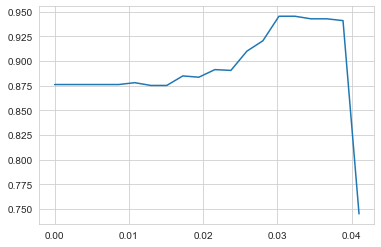

In [91]:
importance = RFC_clf.fit(Xtrain.iloc[:,3:],Ytrain).feature_importances_
threshold = np.linspace(0,importance.max(),20)
score = []
time0 = time()
for i in threshold:
    X_embedded = SelectFromModel(RFC_clf,threshold=i).fit_transform(Xtrain.iloc[:,3:],Ytrain)
    val = cross_val_score(RFC_clf,X_embedded,Ytrain,cv=5).mean()
    score.append(val)
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))
plt.plot(threshold,score)
plt.show();

In [92]:
np.max(score) #Highest Score

0.9453910343465477

In [93]:
threshold[np.argmax(score)] #The highest importance's threshold 

0.030204590246102548

In [97]:
X_embedded = SelectFromModel(RFC_clf,threshold=0.030204590246102548).fit_transform(Xtrain.iloc[:,3:],Ytrain)

In [98]:
col_k_ = list(Xtrain.iloc[:,3:].columns[RFC_clf.feature_importances_>0.030204590246102548])

**Select 8 features based on threshold **

In [99]:
col_k_

['lasthtlordergap',
 'cityuvs',
 'cityorders',
 'lastpvgap',
 'cr',
 'sid',
 'visitnum_oneyear',
 'h']

In [114]:
Xtrain_new1 = pd.DataFrame(X_embedded,columns = col_k_ )
Xtrain_new2 = Xtrain.iloc[:,:3].reset_index(drop=True)
Xtrain_new = pd.concat([Xtrain_new2, Xtrain_new1], axis = 1)
Xtrain_new

,sampleid,d,arrival,lasthtlordergap,cityuvs,cityorders,lastpvgap,cr,sid,visitnum_oneyear,h
0,879915,2016-05-17,2016-05-21,713.0,5.387,0.680000,312.0,1.140000,111.0,2162.0,18.0
1,73262,2016-05-15,2016-05-15,97890.0,3.853,0.027000,3594.0,1.000000,54.0,1397.0,22.0
2,316906,2016-05-15,2016-05-15,4601.0,11.573,0.813000,299.0,1.070000,385.0,2881.0,15.0
3,485736,2016-05-16,2016-05-16,-1.0,10.567,3.033000,1273.0,1.000000,37.0,1218.0,15.0
4,404846,2016-05-16,2016-05-20,52076.0,0.160,0.013000,31216.0,2.000000,61.0,318.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...
482956,560456,2016-05-17,2016-05-17,1947.0,8.080,2.047000,1852.0,1.500000,6.0,289.0,12.0
482957,529935,2016-05-21,2016-06-08,484891.0,0.287,0.013000,5922.0,1.137801,246.0,558.0,23.0
482958,29457,2016-05-20,2016-05-26,-1.0,1.440,0.113000,2033.0,1.137801,6.0,1772.0,3.0
482959,1106538,2016-05-21,2016-05-21,-1.0,0.467,2.250719,2838.0,1.137801,655.0,1316.0,21.0


In [115]:
col_k = ['sampleid','d','arrival']+col_k_

In [116]:
Xtest_new = Xtest.loc[:,col_k].reset_index(drop=True)
Xtest_new

,sampleid,d,arrival,lasthtlordergap,cityuvs,cityorders,lastpvgap,cr,sid,visitnum_oneyear,h
0,1035222,2016-05-20,2016-05-21,218111.0,0.840,0.107,179.0,1.000000,530,3415.0,6
1,222533,2016-05-15,2016-05-15,-1.0,38.960,9.160,35.0,1.000000,7,649.0,8
2,851761,2016-05-15,2016-05-15,19564.0,39.047,8.467,1725.0,1.050000,73,2979.0,12
3,273451,2016-05-20,2016-05-20,-1.0,36.467,6.960,250.0,1.136717,43,366.0,1
4,330795,2016-05-20,2016-06-07,-1.0,0.473,0.060,27344.0,1.136717,11,507.0,1
...,...,...,...,...,...,...,...,...,...,...,...
206979,907321,2016-05-16,2016-05-28,-1.0,0.033,0.007,237.0,1.000000,25,914.0,17
206980,218285,2016-05-15,2016-05-15,9379.0,0.293,0.067,1089.0,1.030000,459,3981.0,6
206981,601862,2016-05-19,2016-06-09,27747.0,6.680,0.547,640.0,1.136717,240,2624.0,17
206982,1038976,2016-05-19,2016-05-22,35.0,0.593,0.107,28.0,2.000000,37,314.0,22


**Store Cleaned Data**

<AxesSubplot:>

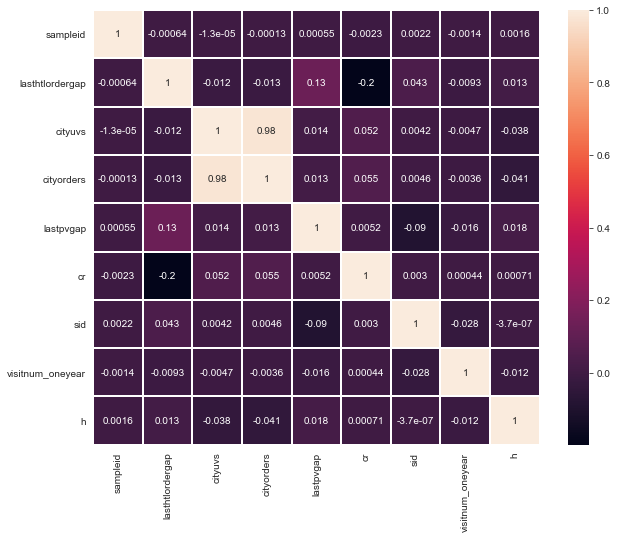

In [117]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(Xtrain_new.corr(),annot=True,linewidths=1)

It's been identified that there's a high correlation between cityorders and cityuvs.

In [118]:
Xtrain_new

,sampleid,d,arrival,lasthtlordergap,cityuvs,cityorders,lastpvgap,cr,sid,visitnum_oneyear,h
0,879915,2016-05-17,2016-05-21,713.0,5.387,0.680000,312.0,1.140000,111.0,2162.0,18.0
1,73262,2016-05-15,2016-05-15,97890.0,3.853,0.027000,3594.0,1.000000,54.0,1397.0,22.0
2,316906,2016-05-15,2016-05-15,4601.0,11.573,0.813000,299.0,1.070000,385.0,2881.0,15.0
3,485736,2016-05-16,2016-05-16,-1.0,10.567,3.033000,1273.0,1.000000,37.0,1218.0,15.0
4,404846,2016-05-16,2016-05-20,52076.0,0.160,0.013000,31216.0,2.000000,61.0,318.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...
482956,560456,2016-05-17,2016-05-17,1947.0,8.080,2.047000,1852.0,1.500000,6.0,289.0,12.0
482957,529935,2016-05-21,2016-06-08,484891.0,0.287,0.013000,5922.0,1.137801,246.0,558.0,23.0
482958,29457,2016-05-20,2016-05-26,-1.0,1.440,0.113000,2033.0,1.137801,6.0,1772.0,3.0
482959,1106538,2016-05-21,2016-05-21,-1.0,0.467,2.250719,2838.0,1.137801,655.0,1316.0,21.0


In [119]:
Xtrain_new.drop(columns='cityuvs',axis=1,inplace=True)

In [120]:
Xtest_new.drop(columns='cityuvs',axis=1,inplace=True)

In [121]:
Xtrain_new

,sampleid,d,arrival,lasthtlordergap,cityorders,lastpvgap,cr,sid,visitnum_oneyear,h
0,879915,2016-05-17,2016-05-21,713.0,0.680000,312.0,1.140000,111.0,2162.0,18.0
1,73262,2016-05-15,2016-05-15,97890.0,0.027000,3594.0,1.000000,54.0,1397.0,22.0
2,316906,2016-05-15,2016-05-15,4601.0,0.813000,299.0,1.070000,385.0,2881.0,15.0
3,485736,2016-05-16,2016-05-16,-1.0,3.033000,1273.0,1.000000,37.0,1218.0,15.0
4,404846,2016-05-16,2016-05-20,52076.0,0.013000,31216.0,2.000000,61.0,318.0,5.0
...,...,...,...,...,...,...,...,...,...,...
482956,560456,2016-05-17,2016-05-17,1947.0,2.047000,1852.0,1.500000,6.0,289.0,12.0
482957,529935,2016-05-21,2016-06-08,484891.0,0.013000,5922.0,1.137801,246.0,558.0,23.0
482958,29457,2016-05-20,2016-05-26,-1.0,0.113000,2033.0,1.137801,6.0,1772.0,3.0
482959,1106538,2016-05-21,2016-05-21,-1.0,2.250719,2838.0,1.137801,655.0,1316.0,21.0


In [122]:
Xtest_new

,sampleid,d,arrival,lasthtlordergap,cityorders,lastpvgap,cr,sid,visitnum_oneyear,h
0,1035222,2016-05-20,2016-05-21,218111.0,0.107,179.0,1.000000,530,3415.0,6
1,222533,2016-05-15,2016-05-15,-1.0,9.160,35.0,1.000000,7,649.0,8
2,851761,2016-05-15,2016-05-15,19564.0,8.467,1725.0,1.050000,73,2979.0,12
3,273451,2016-05-20,2016-05-20,-1.0,6.960,250.0,1.136717,43,366.0,1
4,330795,2016-05-20,2016-06-07,-1.0,0.060,27344.0,1.136717,11,507.0,1
...,...,...,...,...,...,...,...,...,...,...
206979,907321,2016-05-16,2016-05-28,-1.0,0.007,237.0,1.000000,25,914.0,17
206980,218285,2016-05-15,2016-05-15,9379.0,0.067,1089.0,1.030000,459,3981.0,6
206981,601862,2016-05-19,2016-06-09,27747.0,0.547,640.0,1.136717,240,2624.0,17
206982,1038976,2016-05-19,2016-05-22,35.0,0.107,28.0,2.000000,37,314.0,22


In [123]:
Ytrain.value_counts()

0    350351
1    132610
Name: label, dtype: int64

In [124]:
Xtrain_new.to_csv('Xtrain_new.csv')
Xtest_new.to_csv('Xtest_new.csv')
Ytrain.to_csv('Ytrain.csv')
Ytest.to_csv('Ytest.csv')